<a href="https://colab.research.google.com/github/oldn07/isadora.ferreira/blob/main/JorComp-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCOBRINDO A PAUTA:**
Antes de qualquer coisa buscamos conhecer a base de dados, depois de analisarmos os dados de uma forma geral, afinilar o que queríamos, optamos por restringir a busca pelos seguintes critérios: 2021, Rio de Janeiro, Violência Sexual.

1) Abaixo plotamos o gráfico pelo critério de faixa etária, com isso chegamos as seguintes conclusões:
  - A maior ocorrência de casos de violência sexual é da faixa etária de 0 a 14 anos de idade.
  - Quanto maior a idade da vítima menor a ocorrência.


✅ PAUTA ENCONTRADA
❗❗❗❗ MAIS DA METADE DOS CASOS DE VIOLÊNCIA SEXUAL OCORRERAM CONTRA CRIANÇAS E PRÉ ADOLESCENTES DOS ZERO AOS QUATORZE ANOS.❗❗❗❗

***OBSERVE ABAIXO COMO CHEGAMOS NESSA INFORMAÇÃO:***

In [4]:
#Importando pacote pandas como pd
import pandas as pd

#Recurso será utilizado depois para plotagem do gráfico
import matplotlib.pyplot as plt

#Leitura da base de dados em csv
base = pd.read_csv('/content/seguranca_estado_geral[1].csv')

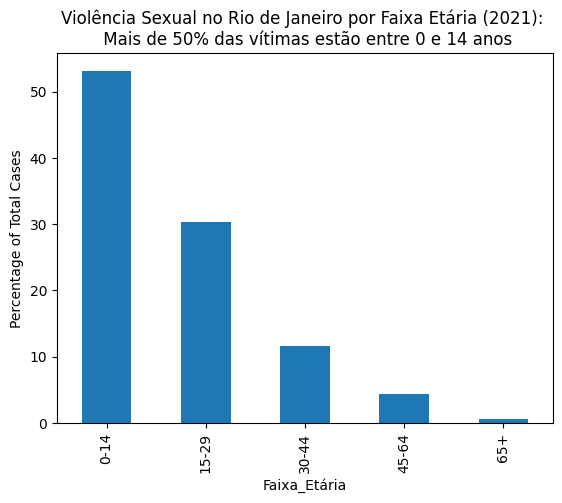

In [7]:
#Selecionando colunas
base2 = base[['Ano', 'Estado', 'Tipo_de_Violência', 'Quantidade_de_Casos', 'Faixa_Etária', 'Raça']]

#Filtrando a base de dados
novo_df = base2[(base2['Ano'] == 2021) &
               (base2['Estado'] == 'Rio De Janeiro') &
               (base2['Tipo_de_Violência'] == 'Violência Sexual')]

# Calculo da soma total de casos
total_casos = novo_df['Quantidade_de_Casos'].sum()

#Criando index/tabela dinâmica
pivot_table = novo_df.pivot_table(index='Faixa_Etária', values='Quantidade_de_Casos', aggfunc='sum')

# Caculo da porcentagem, isto é, total de casos multiplicado por 100, resultando no valor em %
pivot_table['Percentage'] = pivot_table['Quantidade_de_Casos'] / total_casos * 100

# Organizando o index por faixa etária
pivot_table = pivot_table.reindex(['0-14', '15-29', '30-44', '45-64', '65+'])

# Plotando a tabela de barra
pivot_table['Percentage'].plot(kind='bar')

#Settando título e rótulos da base e lateral esquerda
plt.title('Violência Sexual no Rio de Janeiro por Faixa Etária (2021): \n Mais de 50% das vítimas estão entre 0 e 14 anos')
plt.xlabel('Faixa_Etária')
plt.ylabel('Percentage of Total Cases')

#Rodando a base
plt.show()

In [8]:
#Solicitamos a quantidade total de casos por faixa-etária para elaborarmos um gráfico no flourish, que possui mais recursos visuais.
for faixa_etaria, quantidade_casos in pivot_table['Quantidade_de_Casos'].items():
    print(f'Faixa Etária: {faixa_etaria}, Quantidade de Casos: {quantidade_casos}')

Faixa Etária: 0-14, Quantidade de Casos: 3289
Faixa Etária: 15-29, Quantidade de Casos: 1874
Faixa Etária: 30-44, Quantidade de Casos: 721
Faixa Etária: 45-64, Quantidade de Casos: 269
Faixa Etária: 65+, Quantidade de Casos: 40


2) Já que mais de 50% dos casos de violência sexual aconteceram contra crianças e adolescentes de até 14 anos, optamos por explorar mais os dados referentes a essa faixa-etária. A começar pelo critério racial, para entender se há distinção na ocorrência com base em raça.

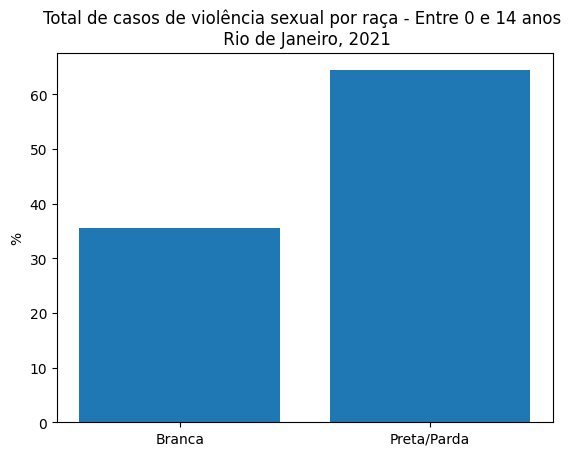

In [15]:
#Atribuindo a base2 as colunas: Ano, Estado, Tipo_de_Violência, Quantidade_de_Casos, Faixa_Etária e Raça
base2 = base[['Ano', 'Estado', 'Tipo_de_Violência', 'Quantidade_de_Casos', 'Faixa_Etária', 'Raça']]

#Filtrando o novo dataframe:
# Dados: 2021, RJ, Violência Sexual, 0-14 anos, Branca, Preta e Parda. Obs: Demais raças são porcentagens irrisórias - indígenas e outros.

novo_df = base2[(base2['Ano'] == 2021) &
               (base2['Estado'] == 'Rio De Janeiro') &
               (base2['Tipo_de_Violência'] == 'Violência Sexual') &
               (base2['Faixa_Etária'] == '0-14') &
               (base2['Raça'].isin(['Branca', 'Preta', 'Parda']))]

#Agrupando e somando a Quantidade_de_Casos
agrupado_df = novo_df.groupby('Raça')['Quantidade_de_Casos'].sum()

#Dividimos a coluna raça em duas categorias: branca e preta/parda. sendo preta/parda por definição (IBGE) referente a população negra.
mod_df = pd.DataFrame({
    'Raça': ['Branca', 'Preta/Parda'],
    'Quantidade_de_Casos': [agrupado_df['Branca'], agrupado_df[['Preta', 'Parda']].sum()]
})

#Calculando o valor de cada raça com porcentagem
porcentagem = (mod_df['Quantidade_de_Casos'] / mod_df['Quantidade_de_Casos'].sum()) * 100

#Plotando o gráfico utilizando o matplotlib (importado logo após o pacote)
plt.bar(mod_df['Raça'], porcentagem)
plt.ylabel('%')
plt.title('Total de casos de violência sexual por raça - Entre 0 e 14 anos \n Rio de Janeiro, 2021')
plt.show()


In [16]:
#Printamos a porcentagem para checar os dados
print(porcentagem)

0    35.61911
1    64.38089
Name: Quantidade_de_Casos, dtype: float64


In [10]:
#Exibindo os números das quantidades totais de cada raça
for raca, quantidade_casos in agrupado_df.items():
    print(f'Raça: {raca}, Quantidade de Casos: {quantidade_casos}')

Raça: Branca, Quantidade de Casos: 1096
Raça: Parda, Quantidade de Casos: 1537
Raça: Preta, Quantidade de Casos: 444


3) Optamos por utilizar, ao invés de Estados (que seriam muitos), as regiões do país: Sul, Sudeste, Norte, Nordeste e Centroeste.

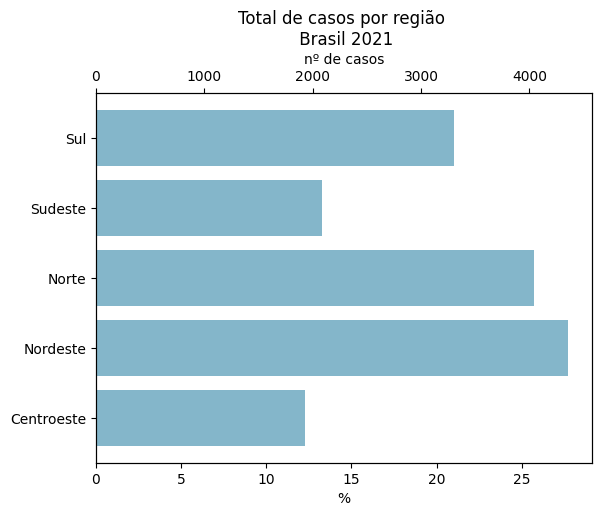

In [27]:
#Filtrando a base de dados
filtrada_df = base[(base['Ano'] == 2021) &
                   (base['Faixa_Etária'] == '0-14') &
                   (base['Tipo_de_Violência'] == 'Violência Sexual')]

#Criando os mapas das regiões do país
region_mapping = {
    'Sul': ['Rio Grande do Sul', 'Santa Catarina', 'Paraná'],
    'Sudeste': ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo'],
    'Norte': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'],
    'Nordeste': ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'],
    'Centroeste': ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
}

#Criando uma coluna com os valores estabelecidos - foi necessário criar uma cópia do df para utilizar loc. Solução para: SettingWithCopyWarning
filtrada_df = filtrada_df.copy()
filtrada_df.loc[:, 'Região'] = filtrada_df['Estado'].map({estado: regiao for regiao, estados in region_mapping.items() for estado in estados})


#Agrupar e somar casos por região
group_df = filtrada_df.groupby('Região')['Quantidade_de_Casos'].sum()

#Porcentagem total por região
porcentagem = (group_df / group_df.sum()) * 100


#Plotagem
fig, ax = plt.subplots()

#Lado direito - plot
ax.barh(porcentagem.index, porcentagem.values, color='skyblue')

#Total de casos no topo e porcentagem na base
ax2 = ax.twiny()
ax2.barh(group_df.index, group_df.values, color='grey', alpha=0.3)

#Título
ax.set_xlabel('%')
ax2.set_xlabel('nº de casos')
ax.set_title('Total de casos por região \n Brasil 2021')

plt.show()



In [12]:
print(group_df)

Região
Centroeste    1925
Nordeste      4358
Norte         4044
Sudeste       2088
Sul           3300
Name: Quantidade_de_Casos, dtype: int64


In [13]:
# Agrupar e somar casos por região
group_df = filtrada_df.groupby('Região')['Quantidade_de_Casos'].sum()

# Porcentagem total por região
porcentagem = (group_df / group_df.sum()) * 100

# Imprimir os resultados
print("Total de casos por região:")
print(group_df)
print("\nPorcentagem total por região:")
print(porcentagem)

Total de casos por região:
Região
Centroeste    1925
Nordeste      4358
Norte         4044
Sudeste       2088
Sul           3300
Name: Quantidade_de_Casos, dtype: int64

Porcentagem total por região:
Região
Centroeste    12.249443
Nordeste      27.731467
Norte         25.733376
Sudeste       13.286669
Sul           20.999045
Name: Quantidade_de_Casos, dtype: float64
